# Mini Project

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
import pandas as pd
file_path = r'E:\BytewiseIntersnhip\Task18\university_enrollment_(Mini-project-01).csv'
df = pd.read_csv(file_path)
print(df.head())

   course_id course_type  year  enrollment_count pre_score  post_score  \
0          1   classroom  2018               165     28.14        73.0   
1          2   classroom  2020               175     79.68        86.0   
2          3      online  2016               257     57.24        80.0   
3          4      online  2013               251     97.67        75.0   
4          5   classroom  2019               165     39.75        76.0   

  pre_requirement   department  
0        Beginner      Science  
1             NaN      Science  
2             NaN  Mathematics  
3        Beginner   Technology  
4        Beginner      Science  


### Check data types 

In [3]:
print(df.dtypes)

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object


### Check uniques values in dataframe

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print("\n")

Unique values in course_id:
[   1    2    3 ... 1848 1849 1850]


Unique values in course_type:
['classroom' 'online']


Unique values in year:
[2018 2020 2016 2013 2019 2014 2021 2022 2011 2015 2012 2017]


Unique values in enrollment_count:
[165 175 257 251 246 241 261 180 170 256 231 181 236 185 247 155 160 161
 266 237 242 255 245 248 252 238 232 235 171 258 240 169 190 267 156 182
 176 179 154 250 249 159 166 164 262]


Unique values in pre_score:
['28.14' '79.68' '57.24' ... '76' '20.67' '17.57']


Unique values in post_score:
[ 73.  86.  80.  75.  76.  84.  88.  87.  79.  74.  85.  81.  70.  65.
  nan  72.  77.  83.  67.  96.  82.  94.  66.  91.  63.  61.  78.  62.
  90.  69.  60.  71.  95.  68.  54.  64. 105.  57.  98.  55.  56.  59.
  93.  51.  89.  92.  58.  97.  99. 100.  53. 102. 101. 103.]


Unique values in pre_requirement:
['Beginner' nan 'Intermediate']


Unique values in department:
['Science' 'Mathematics' 'Technology' 'Math' 'Engineering']




### Pre_score should ideally be numeric (float64), but it currently contains strings (object).

### Convert coulmn into float from object data type

In [5]:
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')
print(df.dtypes)

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score           float64
post_score          float64
pre_requirement      object
department           object
dtype: object


### Replace Math to Mathematics in Departments

In [6]:
df['department'] = df['department'].replace('Math', 'Mathematics')

###  Convert categorical columns to 'category'

In [7]:
df['course_type'] = df['course_type'].astype('category')
df['pre_requirement'] = df['pre_requirement'].astype('category')
df['department'] = df['department'].astype('category')
print(df.dtypes)

course_id              int64
course_type         category
year                   int64
enrollment_count       int64
pre_score            float64
post_score           float64
pre_requirement     category
department          category
dtype: object


In [8]:
missing_values = df.isnull().sum()
missing_values


course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score           130
post_score          185
pre_requirement     891
department            0
dtype: int64

### Handling missing values in numerical coulmn pre_score and post_score using imputation mean 

In [9]:
df.fillna({'pre_score': df['pre_score'].mean(), 'post_score': df['post_score'].mean()}, inplace=True)

In [10]:
missing_values = df.isnull().sum()
missing_values


course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score            0
pre_requirement     891
department            0
dtype: int64

### Handle missing values in 'pre requirment' and replace it with another catagory 'Pro'

In [11]:
current_categories = df['pre_requirement'].cat.categories
print("Current categories in pre_requirement column:")
print(current_categories)

Current categories in pre_requirement column:
Index(['Beginner', 'Intermediate'], dtype='object')


In [12]:
if 'High' not in current_categories:
    df['pre_requirement'] = df['pre_requirement'].cat.add_categories('Pro')

df['pre_requirement'] = df['pre_requirement'].fillna('Pro')

In [13]:
missing_values = df.isnull().sum()
missing_values

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

In [14]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,Pro,Science
2,3,online,2016,257,57.24,80.0,Pro,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


### Check outliers in Numerical coulmns using quartiles and IQR and apply  Winsorized to removet it

Number of outliers:
post_score    29
dtype: int64


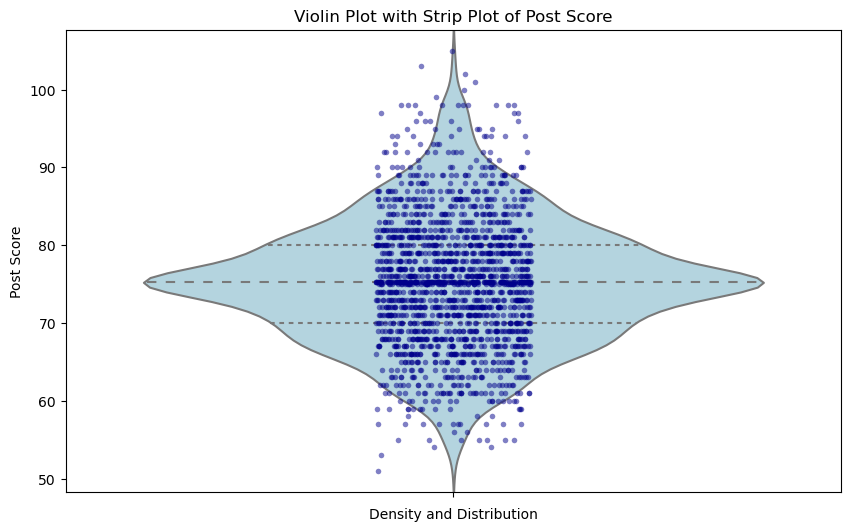

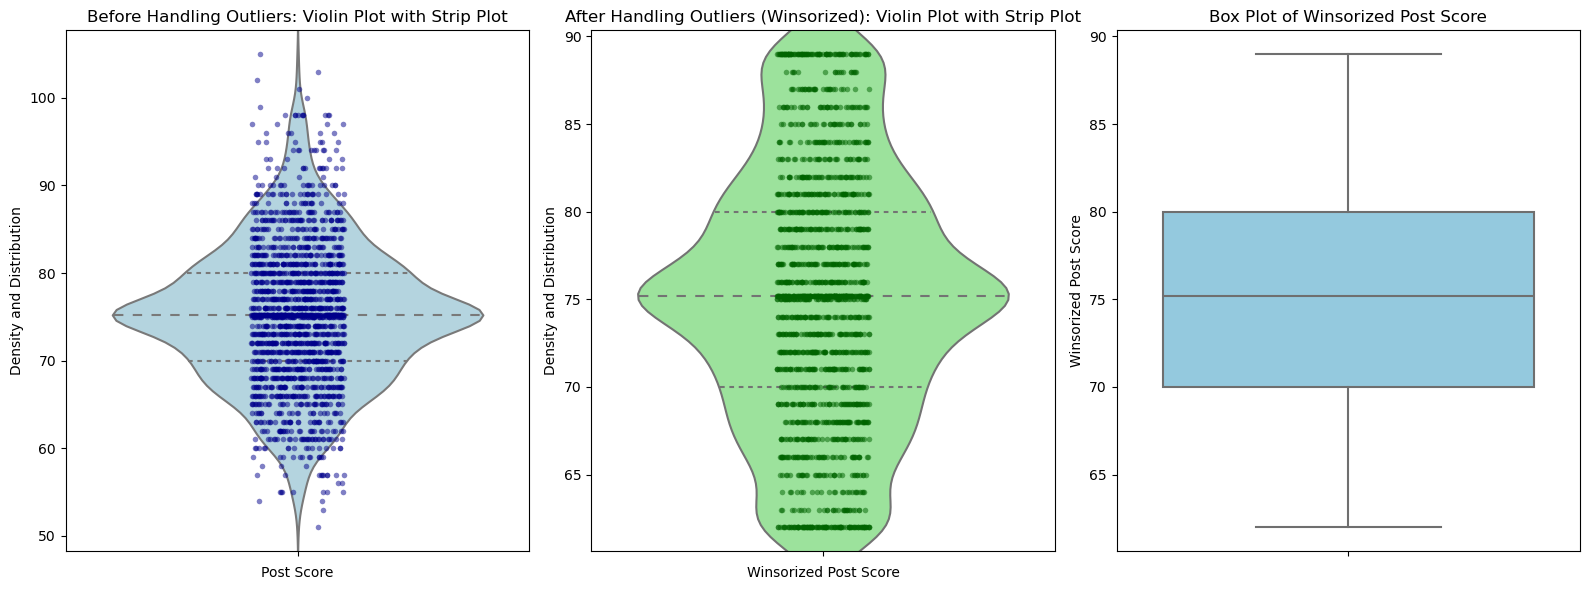

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats

numerical_columns = ['post_score']
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound))
outliers_count = outliers.sum()

print("Number of outliers:")
print(outliers_count)

plt.figure(figsize=(10, 6))

sns.violinplot(y=df['post_score'], color='lightblue', inner='quartile')
sns.stripplot(y=df['post_score'], color='darkblue', alpha=0.5, size=4)

plt.title('Violin Plot with Strip Plot of Post Score')
plt.ylabel('Post Score')
plt.xlabel('Density and Distribution')
plt.show()

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.violinplot(y=df['post_score'], color='lightblue', inner='quartile')
sns.stripplot(y=df['post_score'], color='darkblue', alpha=0.5, size=4)
plt.title('Before Handling Outliers: Violin Plot with Strip Plot')
plt.xlabel('Post Score')
plt.ylabel('Density and Distribution')


df['post_score_winsorized'] = mstats.winsorize(df['post_score'], limits=[0.05, 0.05])

plt.subplot(1, 3, 2)
sns.violinplot(y=df['post_score_winsorized'], color='lightgreen', inner='quartile')
sns.stripplot(y=df['post_score_winsorized'], color='darkgreen', alpha=0.5, size=4)
plt.title('After Handling Outliers (Winsorized): Violin Plot with Strip Plot')
plt.xlabel('Winsorized Post Score')
plt.ylabel('Density and Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['post_score_winsorized'], color='skyblue')
plt.title('Box Plot of Winsorized Post Score')
plt.ylabel('Winsorized Post Score')

plt.tight_layout()
plt.show()


### Normilization for numerical coulmns 

In [16]:
df.head()


,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department,post_score_winsorized
0,1,classroom,2018,165,28.14,73.0,Beginner,Science,73.0
1,2,classroom,2020,175,79.68,86.0,Pro,Science,86.0
2,3,online,2016,257,57.24,80.0,Pro,Mathematics,80.0
3,4,online,2013,251,97.67,75.0,Beginner,Technology,75.0
4,5,classroom,2019,165,39.75,76.0,Beginner,Science,76.0


In [17]:
df.dtypes

course_id                   int64
course_type              category
year                        int64
enrollment_count            int64
pre_score                 float64
post_score                float64
pre_requirement          category
department               category
post_score_winsorized     float64
dtype: object

In [18]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['enrollment_count', 'pre_score', 'post_score', 'post_score_winsorized']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

### Covert Catagorical coulmn into Numerical format

In [19]:
unique_pre_requirements = df['pre_requirement'].cat.categories
unique_pre_requirements

Index(['Beginner', 'Intermediate', 'Pro'], dtype='object')

In [20]:
unique_departments = df['department'].cat.categories
unique_departments

Index(['Engineering', 'Mathematics', 'Science', 'Technology'], dtype='object')

In [21]:
unique_course_types = df['course_type'].cat.categories
unique_course_types

Index(['classroom', 'online'], dtype='object')

### Convert pre_requirment into numerical

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['pre_requirement_encoded'] = encoder.fit_transform(df['pre_requirement'])
unique_categories = df['pre_requirement'].unique()
print("Unique Categories:", unique_categories)
unique_encoded_values = df['pre_requirement_encoded'].unique()
print("Unique Encoded Values:", unique_encoded_values)


Unique Categories: ['Beginner', 'Pro', 'Intermediate']
Categories (3, object): ['Beginner', 'Intermediate', 'Pro']
Unique Encoded Values: [0 2 1]


### Convert department into numerical

In [23]:
label_encoder = LabelEncoder()
df['department_encoded'] = label_encoder.fit_transform(df['department'])
print("Unique Encoded Values:")
print(df['department_encoded'].unique())

Unique Encoded Values:
[2 1 3 0]


### Convert course type into numerical

In [24]:
label_encoder = LabelEncoder()
df['course_type_encoded'] = label_encoder.fit_transform(df['course_type'])
print("Unique Encoded Values:")
print(df['course_type_encoded'].unique())


Unique Encoded Values:
[0 1]


In [25]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department,post_score_winsorized,pre_requirement_encoded,department_encoded,course_type_encoded
0,1,classroom,2018,-1.800183,-0.769311,-0.273117,Beginner,Science,-0.291725,0,2,0
1,2,classroom,2020,-1.529744,1.084605,1.337239,Pro,Science,1.489482,2,2,0
2,3,online,2016,0.687848,0.277428,0.593998,Pro,Mathematics,0.667387,2,1,1
3,4,online,2013,0.525586,1.731713,-0.025370,Beginner,Technology,-0.017693,0,3,1
4,5,classroom,2019,-1.800183,-0.351694,0.098504,Beginner,Science,0.119323,0,2,0


# Detailed  Analysis 

### Central Tendency


### Mean

In [26]:
import pandas as pd

mean_values = df[['enrollment_count', 'pre_score', 'post_score']].mean()
print("Mean values:")
print(mean_values)

Mean values:
enrollment_count   -2.842171e-16
pre_score          -2.534909e-16
post_score          1.321225e-15
dtype: float64


### Median

In [27]:
median_values = df[['enrollment_count', 'pre_score', 'post_score']].median()
print("\nMedian values:")
print(median_values)



Median values:
enrollment_count    5.255856e-01
pre_score          -5.111705e-16
post_score          1.760349e-15
dtype: float64


### Mode:

In [28]:
mode_values = df[['course_type', 'pre_requirement', 'department']].mode()
print("\nMode values:")
print(mode_values)



Mode values:
  course_type pre_requirement  department
0      online             Pro  Technology


### Variability

### Variance and Standard Deviation

In [29]:
variance_values = df[['enrollment_count', 'pre_score', 'post_score']].var()
std_deviation_values = df[['enrollment_count', 'pre_score', 'post_score']].std()

print("\nVariance values:")
print(variance_values)

print("\nStandard deviation values:")
print(std_deviation_values)



Variance values:
enrollment_count    1.000541
pre_score           1.000541
post_score          1.000541
dtype: float64

Standard deviation values:
enrollment_count    1.00027
pre_score           1.00027
post_score          1.00027
dtype: float64


### Range

In [30]:
range_values = df[['enrollment_count', 'pre_score', 'post_score']].max() - df[['enrollment_count', 'pre_score', 'post_score']].min()

print("\nRange values:")
print(range_values)



Range values:
enrollment_count    3.055951
pre_score           3.560353
post_score          6.689171
dtype: float64


### Interquartile Range (IQR)

In [31]:
quartiles = df[['enrollment_count', 'pre_score', 'post_score']].quantile([0.25, 0.75])
iqr_values = quartiles.loc[0.75] - quartiles.loc[0.25]

print("\nInterquartile range (IQR):")
print(iqr_values)



Interquartile range (IQR):
enrollment_count    2.055330
pre_score           1.662104
post_score          1.238735
dtype: float64


### Distribution

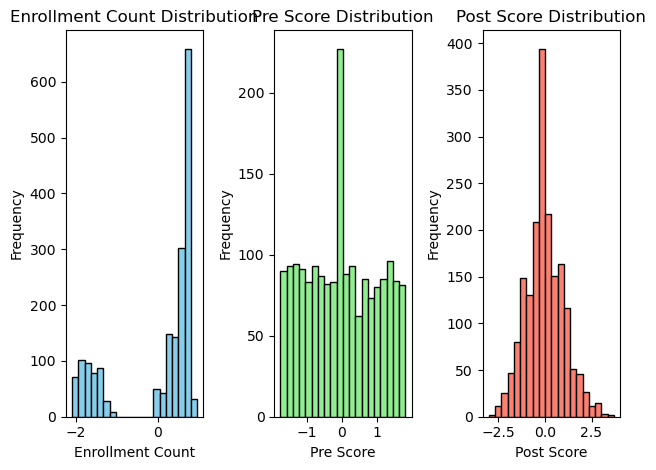

In [32]:
plt.subplot(1, 3, 1)
plt.hist(df['enrollment_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Enrollment Count Distribution')
plt.xlabel('Enrollment Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['pre_score'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Pre Score Distribution')
plt.xlabel('Pre Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['post_score'], bins=20, color='salmon', edgecolor='black')
plt.title('Post Score Distribution')
plt.xlabel('Post Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Density Plot

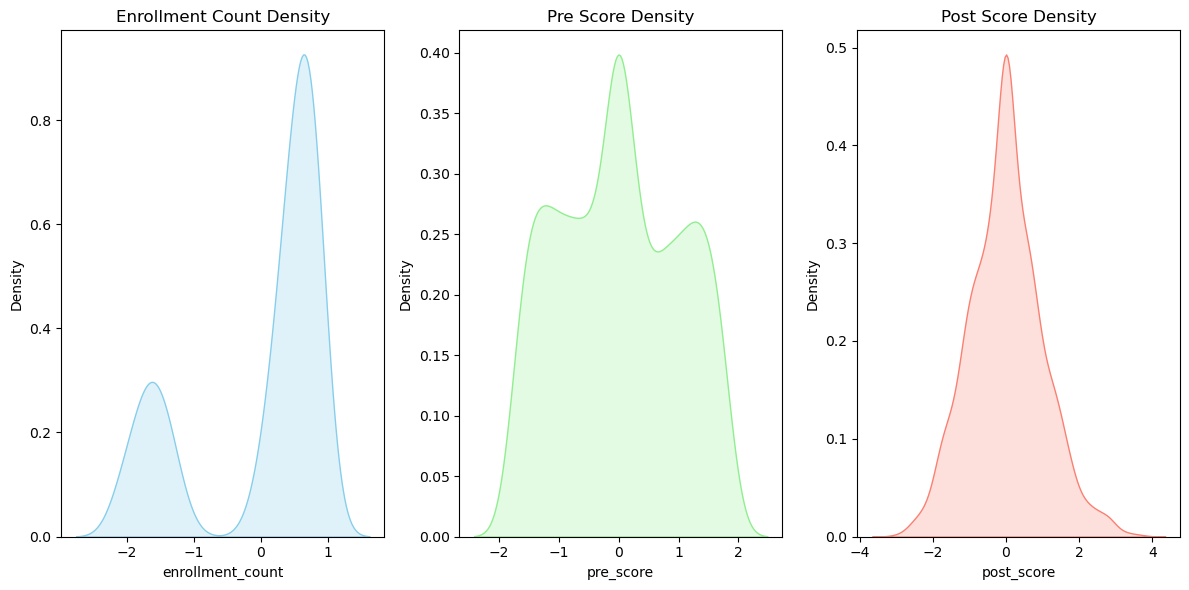

In [33]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns


plt.figure(figsize=(12, 6))

# Using fill=True instead of shade=True
plt.subplot(1, 3, 1)
sns.kdeplot(df['enrollment_count'], fill=True, color='skyblue')
plt.title('Enrollment Count Density')

plt.subplot(1, 3, 2)
sns.kdeplot(df['pre_score'], fill=True, color='lightgreen')
plt.title('Pre Score Density')

plt.subplot(1, 3, 3)
sns.kdeplot(df['post_score'], fill=True, color='salmon')
plt.title('Post Score Density')

plt.tight_layout()
plt.show()


### Correlation Matrix

### Frequency distribution of cataogrical varibles

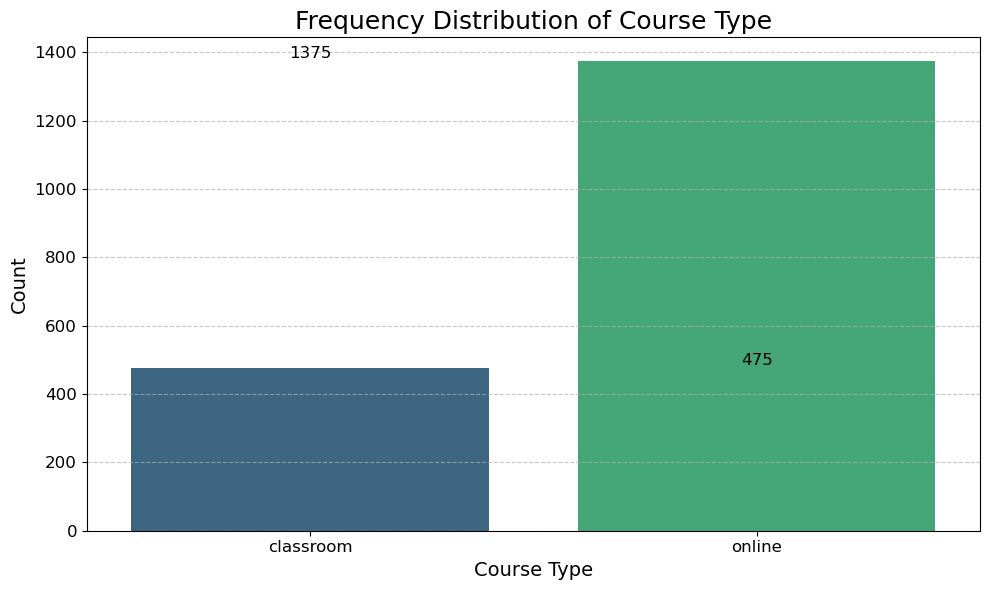

In [34]:
course_type_counts = df['course_type'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=course_type_counts.index, y=course_type_counts.values, palette='viridis')
plt.title('Frequency Distribution of Course Type', fontsize=18)
plt.xlabel('Course Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, count in enumerate(course_type_counts.values):
    plt.text(i, count + 0.5, f'{count}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


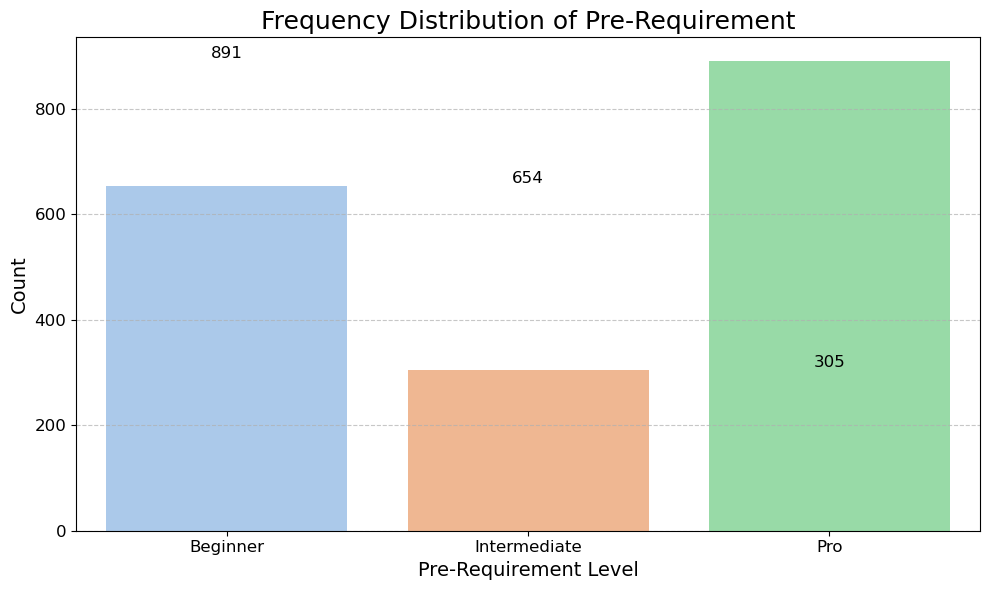

In [35]:
pre_req_counts = df['pre_requirement'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=pre_req_counts.index, y=pre_req_counts.values, palette='pastel')
plt.title('Frequency Distribution of Pre-Requirement', fontsize=18)
plt.xlabel('Pre-Requirement Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, count in enumerate(pre_req_counts.values):
    plt.text(i, count + 0.5, f'{count}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


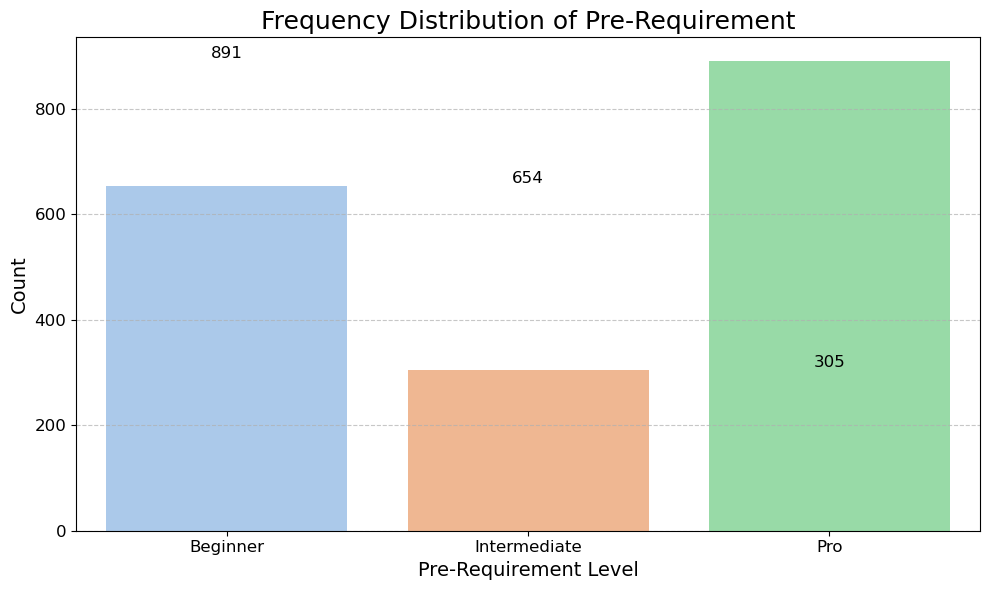

In [36]:
pre_req_counts = df['pre_requirement'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=pre_req_counts.index, y=pre_req_counts.values, palette='pastel')
plt.title('Frequency Distribution of Pre-Requirement', fontsize=18)
plt.xlabel('Pre-Requirement Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(pre_req_counts.values):
    plt.text(i, count + 0.5, f'{count}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


### Correlation Matrix

In [37]:
correlation_matrix = df[['enrollment_count', 'pre_score', 'post_score']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  enrollment_count  pre_score  post_score
enrollment_count          1.000000  -0.009318    0.007179
pre_score                -0.009318   1.000000    0.535085
post_score                0.007179   0.535085    1.000000


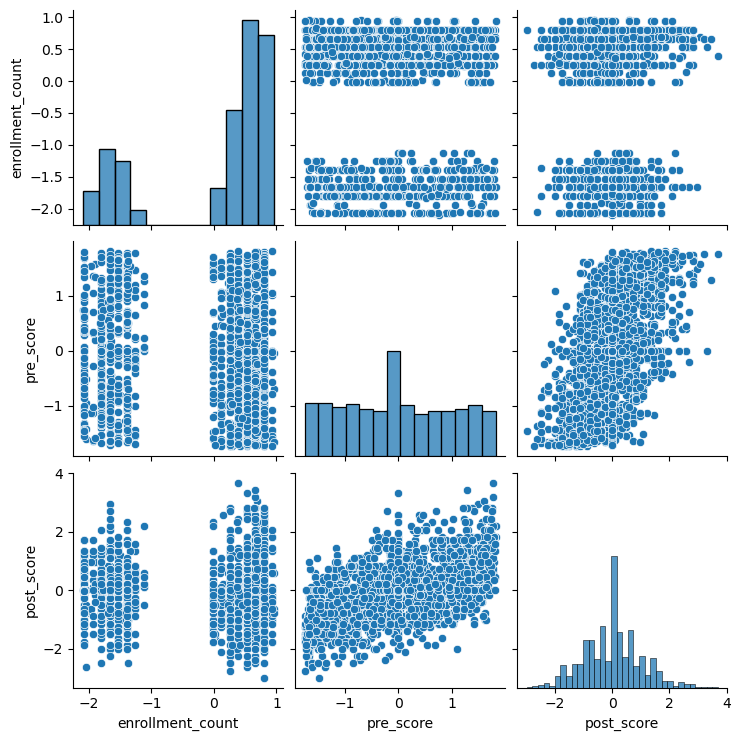

In [38]:
sns.pairplot(df[['enrollment_count', 'pre_score', 'post_score']])
plt.show()


In [39]:
df.dtypes

course_id                     int64
course_type                category
year                          int64
enrollment_count            float64
pre_score                   float64
post_score                  float64
pre_requirement            category
department                 category
post_score_winsorized       float64
pre_requirement_encoded       int32
department_encoded            int32
course_type_encoded           int32
dtype: object

### Association Analysis Using Three-Way Contingency Table for catagorical varibles 

Three-Way Contingency Table:
department                   Engineering  Mathematics  Science  Technology
course_type pre_requirement                                               
classroom   Beginner                  51           37       70          34
            Intermediate              66           16       70          19
            Pro                        8           37       38          29
online      Beginner                  41          118      130         173
            Intermediate              23           42       50          19
            Pro                       30          190      114         445

Cramér's V for three variables: 0.28014562821477385


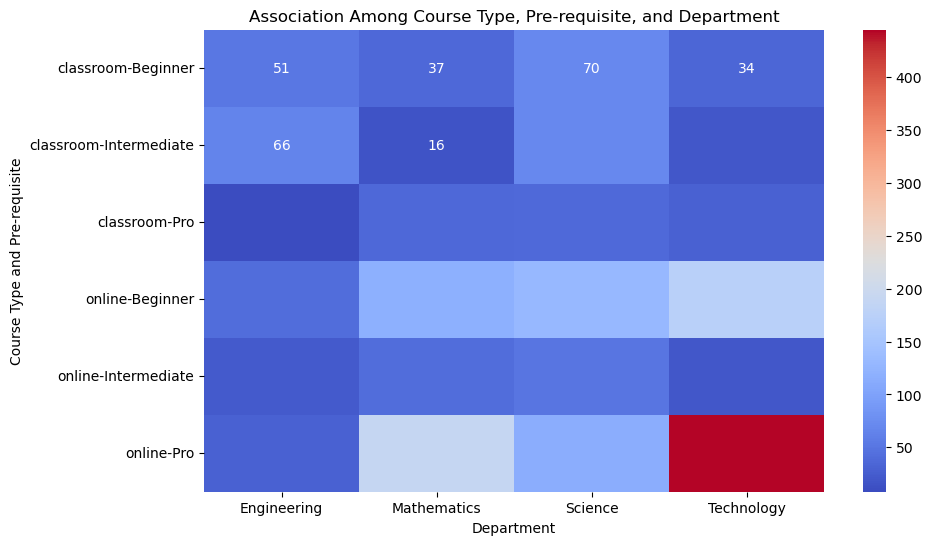

In [40]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(index=[df['course_type'], df['pre_requirement']], columns=df['department'])
print("Three-Way Contingency Table:")
print(contingency_table)

chi2, _, _, _ = chi2_contingency(contingency_table)
num_categories = contingency_table.size
n = len(df)
cramers_v = (chi2 / (n * (min(contingency_table.shape) - 1))) ** 0.5

print("\nCramér's V for three variables:", cramers_v)
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', cbar=True, fmt='d')

# Add labels and title
plt.xlabel('Department')
plt.ylabel('Course Type and Pre-requisite')
plt.title('Association Among Course Type, Pre-requisite, and Department')

plt.show()


In [41]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("\n")


Unique values for 'course_id':
[   1    2    3 ... 1848 1849 1850]


Unique values for 'course_type':
['classroom', 'online']
Categories (2, object): ['classroom', 'online']


Unique values for 'year':
[2018 2020 2016 2013 2019 2014 2021 2022 2011 2015 2012 2017]


Unique values for 'enrollment_count':
[-1.80018251 -1.52974436  0.68784847  0.52558558  0.39036651  0.25514743
  0.79602373 -1.39452529 -1.66496344  0.66080466 -0.01529072 -1.36748147
  0.11992836 -1.25930621  0.41741032 -2.07062066 -1.93540159 -1.90835777
  0.93124281  0.14697217  0.28219125  0.63376084  0.36332269  0.44445414
  0.5526294   0.17401599  0.0117531   0.09288454 -1.63791962  0.71489229
  0.22810362 -1.69200725 -1.12408714  0.95828662 -2.04357685 -1.34043766
 -1.50270055 -1.4215691  -2.09766448  0.49854177  0.47149795 -1.9624454
 -1.7731387  -1.82722633  0.82306755]


Unique values for 'pre_score':
[-0.76931106  1.08460483  0.27742841 ...  0.95223366 -1.03801016
 -1.14951849]


Unique values for 'post_score':
[-

### Segmentaion and Grouping 

### Segmentation by course_type:

In [42]:
classroom_data = df[df['course_type'] == 'classroom']
online_data = df[df['course_type'] == 'online']
classroom_stats = classroom_data['enrollment_count'].describe()
online_stats = online_data['enrollment_count'].describe()

print("Classroom Enrollment Statistics:")
print(classroom_stats)
print("\nOnline Enrollment Statistics:")
print(online_stats)


Classroom Enrollment Statistics:
count    475.000000
mean      -1.653349
std        0.248372
min       -2.097664
25%       -1.800183
50%       -1.664963
75%       -1.394525
max       -1.124087
Name: enrollment_count, dtype: float64

Online Enrollment Statistics:
count    1375.000000
mean        0.571157
std         0.231703
min        -0.015291
25%         0.390367
50%         0.660805
75%         0.796024
max         0.958287
Name: enrollment_count, dtype: float64


### Segmentation by pre_requirement

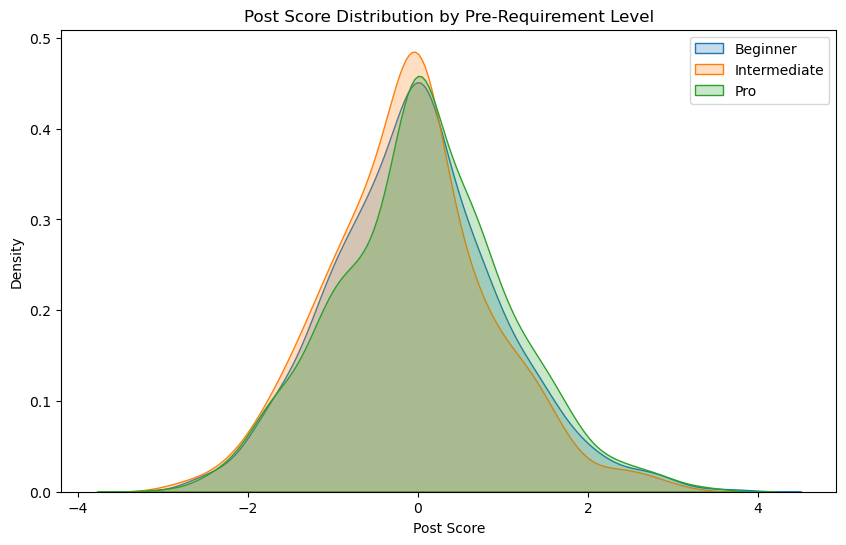

In [43]:
beginner_data = df[df['pre_requirement'] == 'Beginner']
intermediate_data = df[df['pre_requirement'] == 'Intermediate']
pro_data = df[df['pre_requirement'] == 'Pro']

plt.figure(figsize=(10, 6))
sns.kdeplot(beginner_data['post_score'], label='Beginner', shade=True)
sns.kdeplot(intermediate_data['post_score'], label='Intermediate', shade=True)
sns.kdeplot(pro_data['post_score'], label='Pro', shade=True)
plt.title('Post Score Distribution by Pre-Requirement Level')
plt.xlabel('Post Score')
plt.ylabel('Density')
plt.legend()
plt.show()


###  Segmenting by department

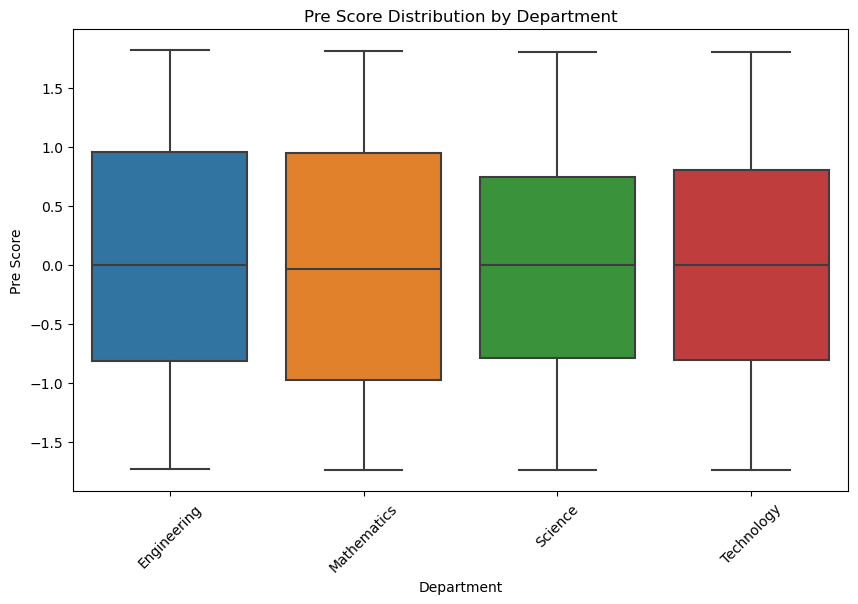

In [44]:
engineering_data = df[df['department'] == 'Engineering']
mathematics_data = df[df['department'] == 'Mathematics']
science_data = df[df['department'] == 'Science']
technology_data = df[df['department'] == 'Technology']

plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='pre_score', data=df)
plt.title('Pre Score Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Pre Score')
plt.xticks(rotation=45)
plt.show()


### Group Comparison and Visualization

### Comparing Numerical Variables Across Segments:

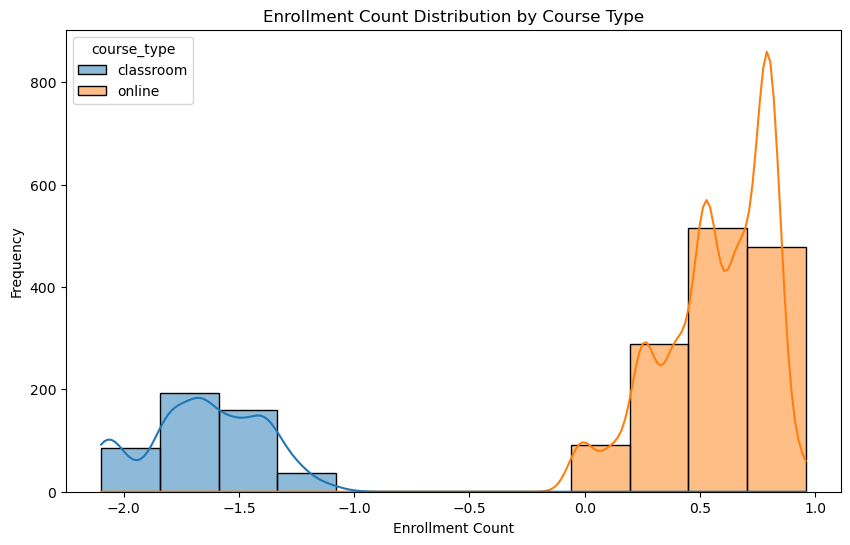

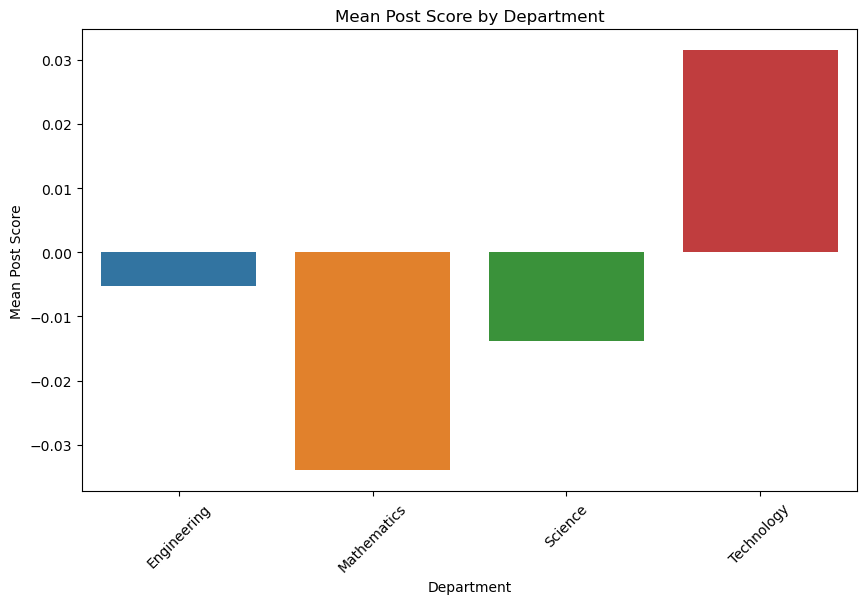

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='enrollment_count', hue='course_type', kde=True)
plt.title('Enrollment Count Distribution by Course Type')
plt.xlabel('Enrollment Count')
plt.ylabel('Frequency')
plt.show()

grouped_department = df.groupby('department')['post_score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='post_score', data=grouped_department)
plt.title('Mean Post Score by Department')
plt.xlabel('Department')
plt.ylabel('Mean Post Score')
plt.xticks(rotation=45)
plt.show()


### Time Trends

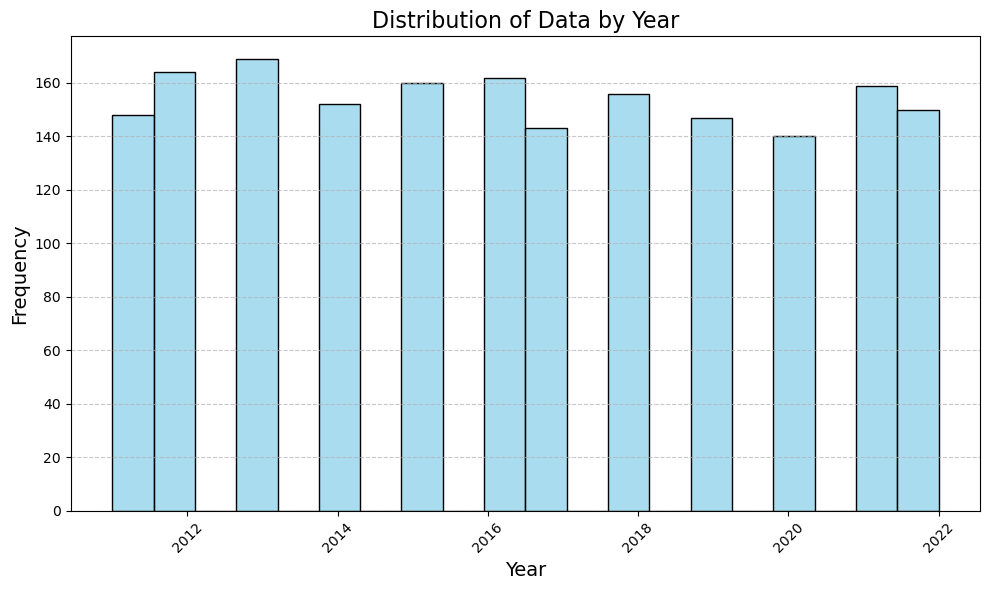

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', bins=20, kde=False, alpha=0.7, color='skyblue')
plt.title('Distribution of Data by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


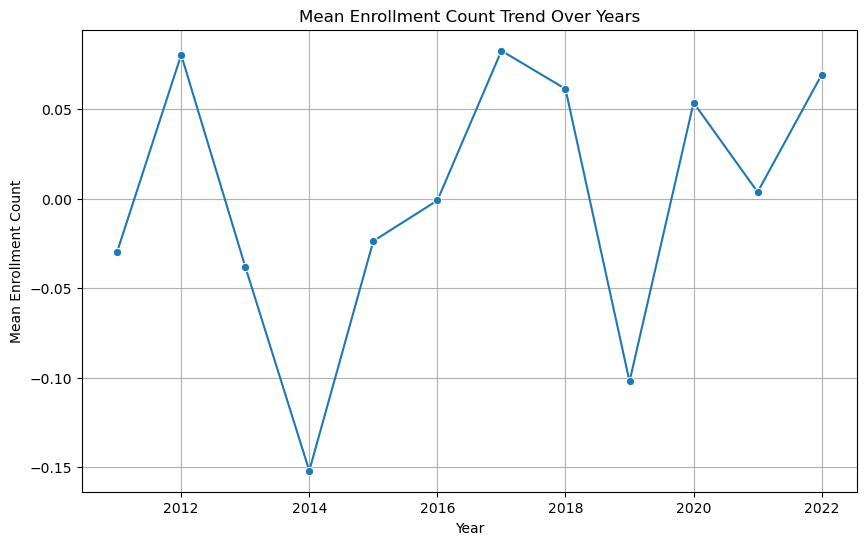

In [47]:
grouped_year = df.groupby('year').agg({'enrollment_count': 'mean'}).reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_year, x='year', y='enrollment_count', marker='o')
plt.title('Mean Enrollment Count Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Enrollment Count')
plt.grid(True)
plt.show()


### Comparative analysis

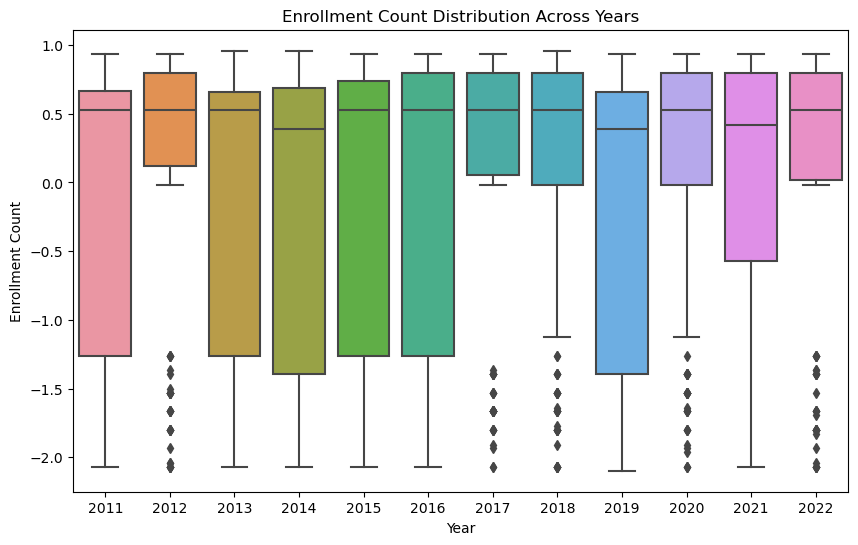

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='enrollment_count')
plt.title('Enrollment Count Distribution Across Years')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.show()


### perform statistical tests (e.g., ANOVA) to determine if there are significant differences between years:

One-way ANOVA results: F-statistic = 0.838425452123842, p-value = 0.6013979532960188


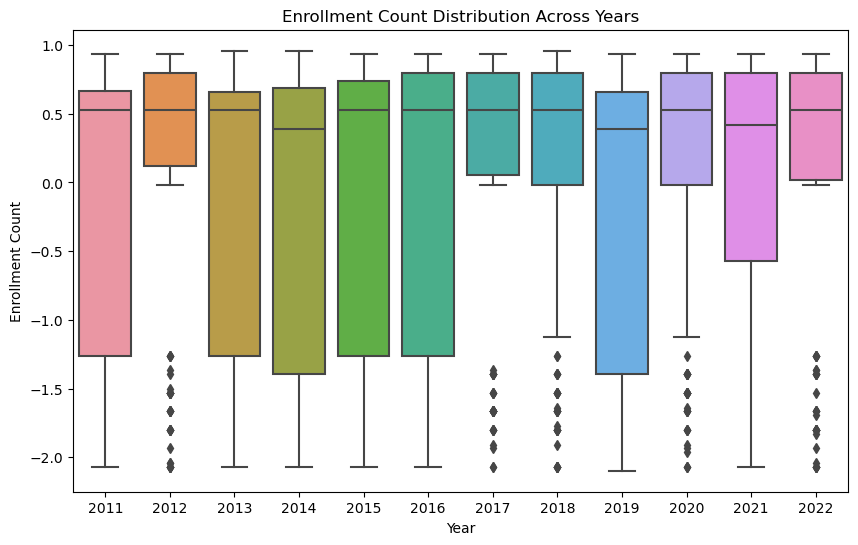

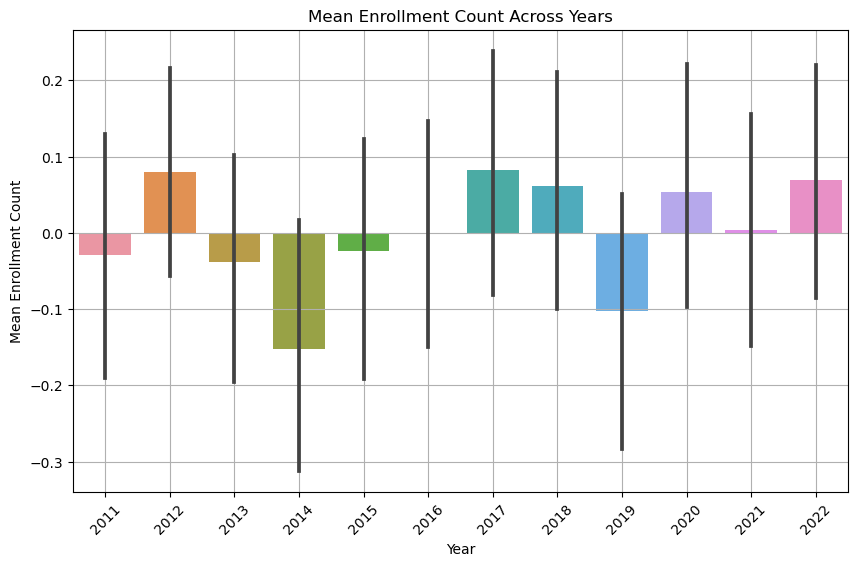

In [49]:
from scipy.stats import f_oneway


years = df['year'].unique()
data_by_year = [df[df['year'] == year]['enrollment_count'] for year in years]

f_stat, p_value = f_oneway(*data_by_year)
print(f"One-way ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='enrollment_count')
plt.title('Enrollment Count Distribution Across Years')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='enrollment_count', data=df)
plt.title('Mean Enrollment Count Across Years')
plt.xlabel('Year')
plt.ylabel('Mean Enrollment Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### The university has started offering online courses to reach a wider range of students and wants your help to understand enrollment trends.

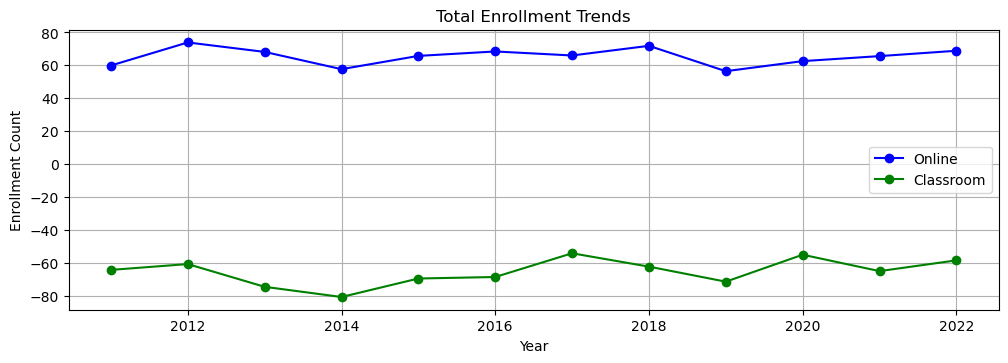

In [50]:

df_online = df[df['course_type'] == 'online']


online_enrollment_by_year = df_online.groupby('year')['enrollment_count'].sum().reset_index()
classroom_enrollment_by_year = df[df['course_type'] == 'classroom'].groupby('year')['enrollment_count'].sum().reset_index()
merged_df = pd.merge(online_enrollment_by_year, classroom_enrollment_by_year, on='year', suffixes=('_online', '_classroom'))
merged_df['enrollment_count_classroom'].replace(0, 1, inplace=True)
merged_df['percent_online'] = (merged_df['enrollment_count_online'] / (merged_df['enrollment_count_online'] + merged_df['enrollment_count_classroom'])) * 100

plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.plot(merged_df['year'], merged_df['enrollment_count_online'], marker='o', linestyle='-', color='b', label='Online')
plt.plot(merged_df['year'], merged_df['enrollment_count_classroom'], marker='o', linestyle='-', color='g', label='Classroom')
plt.title('Total Enrollment Trends')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.legend()
plt.grid(True)



### identify what contributes to higher enrollment and determine if the course type (online or classroom) is a significant factor.

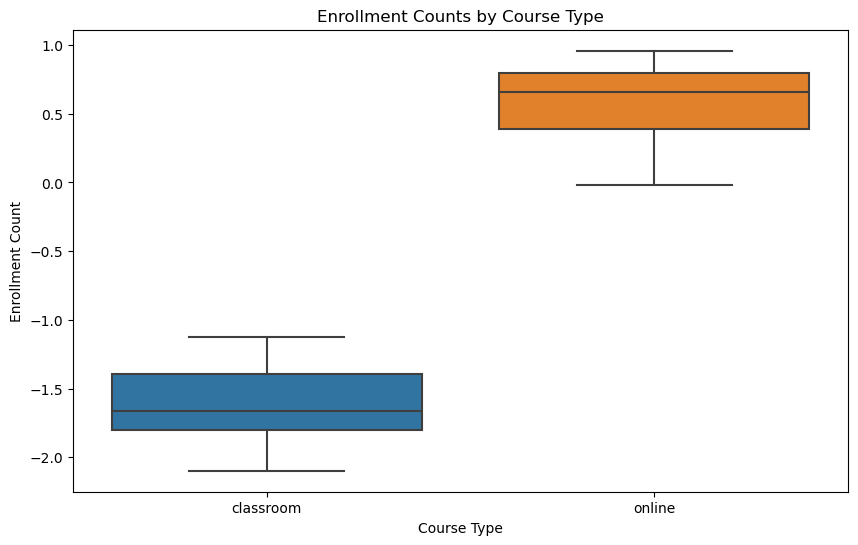

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='course_type', y='enrollment_count', data=df)
plt.title('Enrollment Counts by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Enrollment Count')
plt.show()


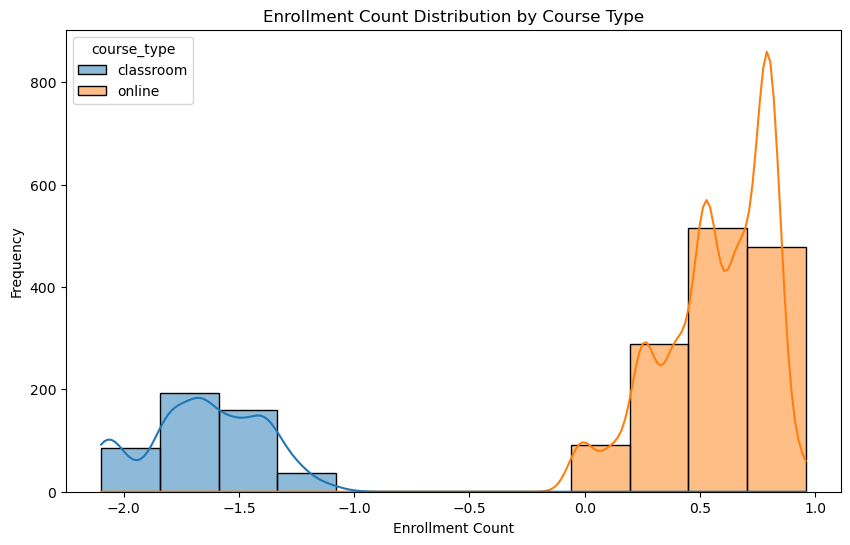

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='enrollment_count', hue='course_type', kde=True)
plt.title('Enrollment Count Distribution by Course Type')
plt.xlabel('Enrollment Count')
plt.ylabel('Frequency')
plt.show()


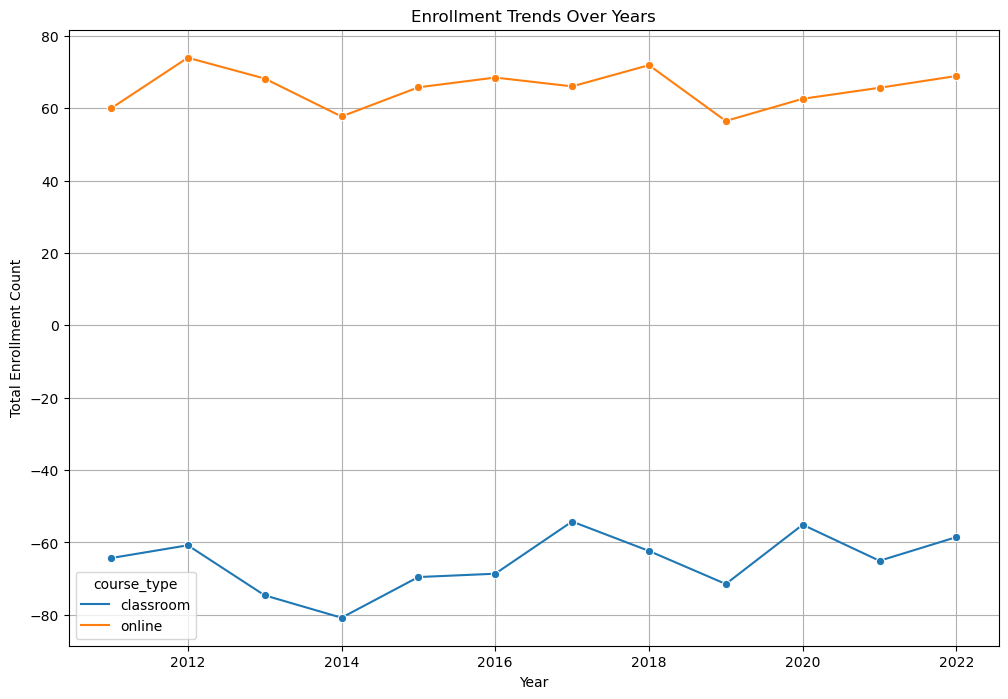

In [53]:
# Group by year and sum enrollment counts for online and classroom courses
enrollment_by_year = df.groupby(['year', 'course_type'])['enrollment_count'].sum().reset_index()

# Plotting enrollment trends over years
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='enrollment_count', hue='course_type', data=enrollment_by_year, marker='o')
plt.title('Enrollment Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Total Enrollment Count')
plt.grid(True)
plt.show()


In [54]:
from scipy.stats import ttest_ind

# Perform t-test
online_enrollment = df[df['course_type'] == 'online']['enrollment_count']
classroom_enrollment = df[df['course_type'] == 'classroom']['enrollment_count']

t_stat, p_value = ttest_ind(online_enrollment, classroom_enrollment)
print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-statistic: 177.0383377938837, p-value: 0.0


In [55]:
from scipy.stats import f_oneway

# Example: ANOVA test to compare enrollment counts across different departments
departments = df['department'].unique()
data_by_department = [df[df['department'] == dept]['enrollment_count'] for dept in departments]

f_stat, p_value = f_oneway(*data_by_department)
print(f"One-way ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")


One-way ANOVA results: F-statistic = 139.46668835369204, p-value = 1.9040368023619567e-81


### Enrollment Trends by couse type

In [56]:
print(df.columns)

Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement', 'department', 'post_score_winsorized',
       'pre_requirement_encoded', 'department_encoded', 'course_type_encoded'],
      dtype='object')


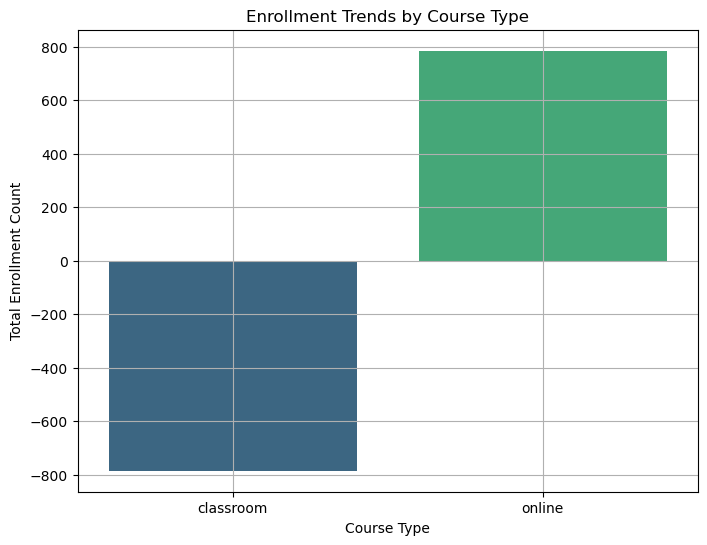

In [57]:
grouped_data = df.groupby('course_type')['enrollment_count'].sum().reset_index()

# Plotting enrollment trends by course type
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='course_type', y='enrollment_count', palette='viridis')
plt.title('Enrollment Trends by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Total Enrollment Count')
plt.grid(True)
plt.show()

### Impact of Pre-Score on Post-Score:

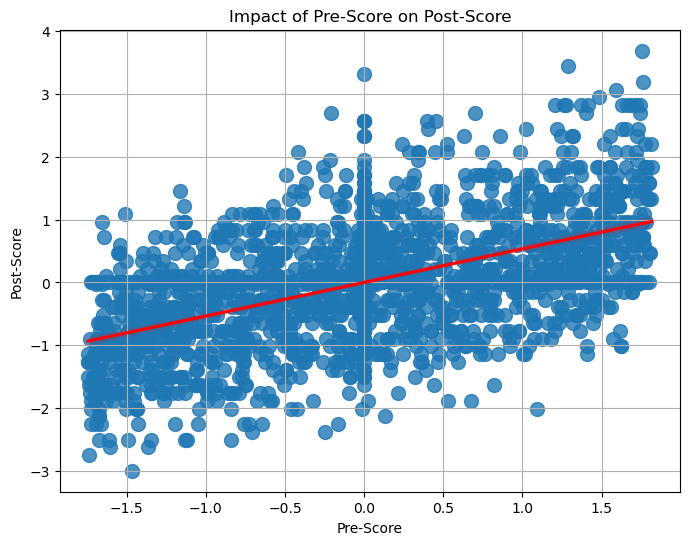

Pearson correlation coefficient: 0.5350852153655407


In [58]:
from scipy.stats import pearsonr
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='pre_score', y='post_score', scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Impact of Pre-Score on Post-Score')
plt.xlabel('Pre-Score')
plt.ylabel('Post-Score')
plt.grid(True)
plt.show()

corr, _ = pearsonr(df['pre_score'], df['post_score'])
print(f"Pearson correlation coefficient: {corr}")


### To investigate the impact of class type (classroom vs. online) on pre-score or post-score

In [59]:
df.dtypes

course_id                     int64
course_type                category
year                          int64
enrollment_count            float64
pre_score                   float64
post_score                  float64
pre_requirement            category
department                 category
post_score_winsorized       float64
pre_requirement_encoded       int32
department_encoded            int32
course_type_encoded           int32
dtype: object

In [60]:
# Check the column names in your DataFrame
print(df.columns)

# Adjust the column name based on your actual DataFrame structure
classroom_scores = df[df['course_type'] == 'classroom']['post_score']
online_scores = df[df['course_type'] == 'online']['post_score']

# Perform t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(classroom_scores, online_scores)

# Print results
print(f"T-statistic: {t_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in post-scores between classroom and online classes.")
else:
    print("There is no significant difference in post-scores between classroom and online classes.")


Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement', 'department', 'post_score_winsorized',
       'pre_requirement_encoded', 'department_encoded', 'course_type_encoded'],
      dtype='object')
T-statistic: 0.3106137483407679, p-value: 0.7561293023770022
There is no significant difference in post-scores between classroom and online classes.


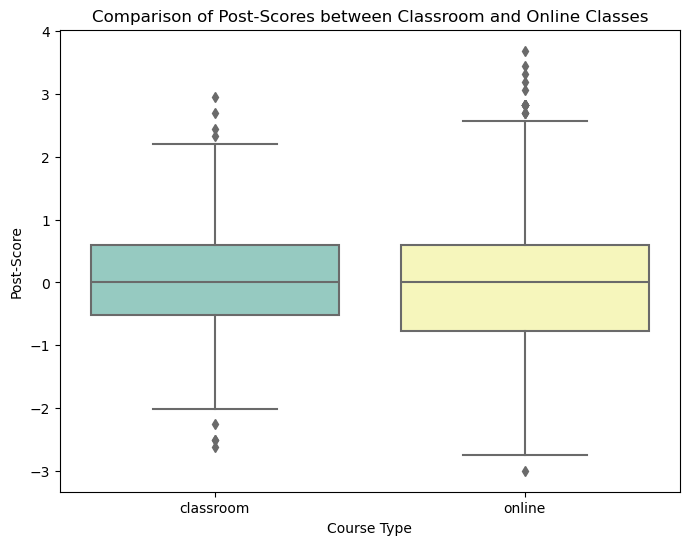

In [61]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='course_type', y='post_score', data=df, palette='Set3')
plt.title('Comparison of Post-Scores between Classroom and Online Classes')
plt.xlabel('Course Type')
plt.ylabel('Post-Score')
plt.show()

###  How does the enrollment count vary across different departments?

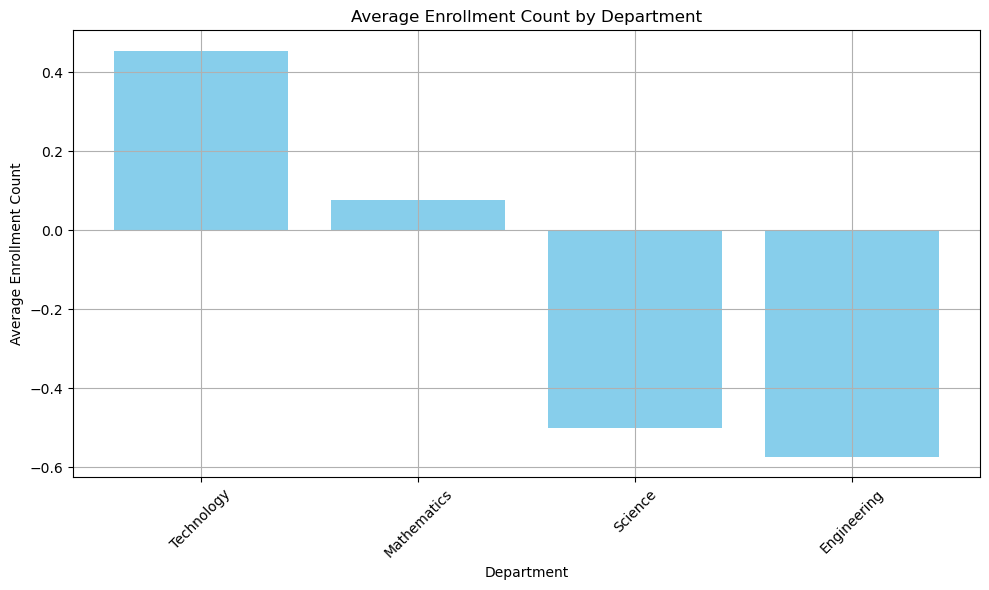

In [62]:
avg_enrollment_by_dept = df.groupby('department')['enrollment_count'].mean().reset_index()
avg_enrollment_by_dept = avg_enrollment_by_dept.sort_values(by='enrollment_count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_enrollment_by_dept['department'], avg_enrollment_by_dept['enrollment_count'], color='skyblue')
plt.title('Average Enrollment Count by Department')
plt.xlabel('Department')
plt.ylabel('Average Enrollment Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### What is the relationship between enrollment count and post-scores across different departments?

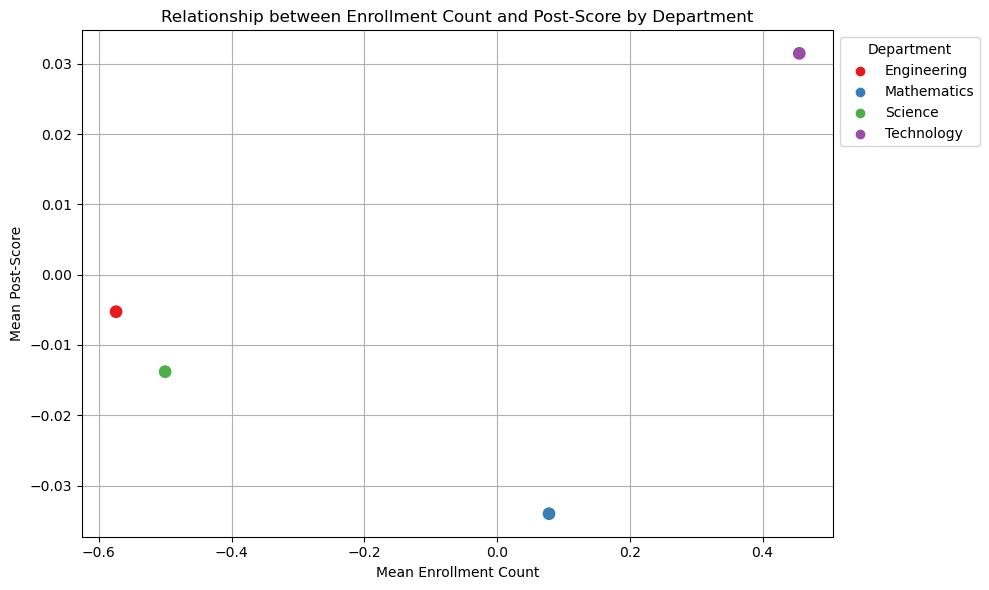

In [63]:
department_stats = df.groupby('department').agg({
    'enrollment_count': 'mean',
    'post_score': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=department_stats, x='enrollment_count', y='post_score', hue='department', palette='Set1', s=100)
plt.title('Relationship between Enrollment Count and Post-Score by Department')
plt.xlabel('Mean Enrollment Count')
plt.ylabel('Mean Post-Score')
plt.legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
print(df.columns)

Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement', 'department', 'post_score_winsorized',
       'pre_requirement_encoded', 'department_encoded', 'course_type_encoded'],
      dtype='object')


### To understand how changes in 'pre_score' (predictor variable) might affect 'post_score' (outcome variable).

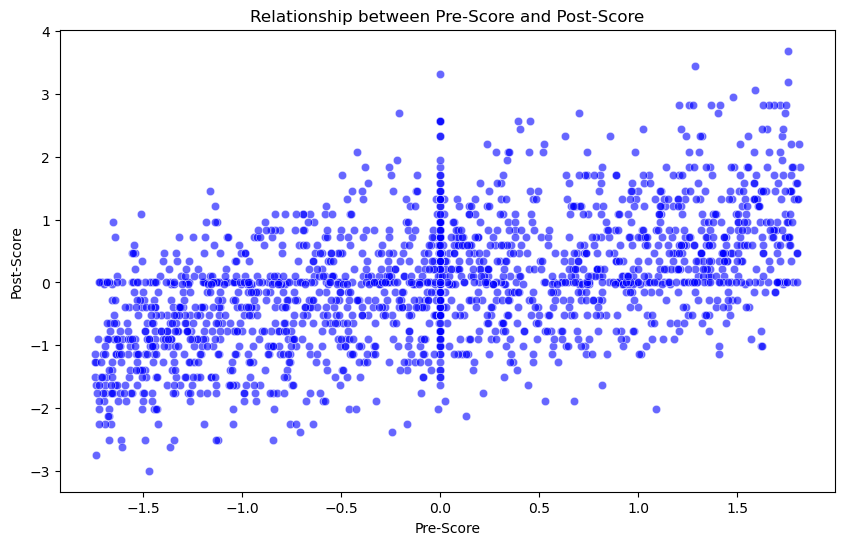

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pre_score', y='post_score', color='b', alpha=0.6)

# Customizing labels and title
plt.title('Relationship between Pre-Score and Post-Score')
plt.xlabel('Pre-Score')
plt.ylabel('Post-Score')

# Display the plot
plt.show()


### Predictive Analysis 

In [66]:
df.dtypes

course_id                     int64
course_type                category
year                          int64
enrollment_count            float64
pre_score                   float64
post_score                  float64
pre_requirement            category
department                 category
post_score_winsorized       float64
pre_requirement_encoded       int32
department_encoded            int32
course_type_encoded           int32
dtype: object

### Predict Enrollment Count Based on Course Characteristics

### Develop models to forecast future enrollment counts based on historical data and various course attributes.



In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['course_type_encoded', 'year', 'pre_score', 'post_score', 'pre_requirement_encoded', 'department_encoded']]
y = df['enrollment_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
print(coefficients)


Mean Squared Error (MSE): 0.04273762308320543
Root Mean Squared Error (RMSE): 0.20673079858406543
R-squared (R²) Score: 0.9537771181873196
                   feature  coefficient
0      course_type_encoded     2.164213
1                     year     0.001698
2                pre_score    -0.001968
3               post_score     0.011243
4  pre_requirement_encoded     0.143890
5       department_encoded     0.014314


In [ ]:
import plotly.express as px
import pandas as pd
data = {
    'feature': ['course_type_encoded', 'year', 'pre_score', 'post_score', 'pre_requirement_encoded', 'department_encoded'],
    'coefficient': [2.164213, 0.001698, -0.001968, 0.011243, 0.143890, 0.014314]
}

df = pd.DataFrame(data)

# Create an interactive bar plot with Plotly
fig = px.bar(df, x='feature', y='coefficient', color='coefficient',
             title='Coefficients of Predictive Model',
             labels={'coefficient': 'Coefficient Value'},
             color_continuous_scale=px.colors.sequential.Blues)

fig.update_layout(xaxis_tickangle=-45)
fig.show()
